**Ejercicio N° 2**

El dataset `data_variables.xlsx` contiene 2500 observaciones de 5 variables cuantitativas `X1` , `X2` , `X3` , `X4` y `X5`.



In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel("datasets\data_variables.xlsx")
df.sample(5)

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_6136\3832496404.py:5: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_excel("datasets\data_variables.xlsx")


,X1,X2,X3,X4,X5
50,62.730804,39.382323,48.420582,40.576890,58.704543
495,52.322829,36.075099,53.157603,54.089380,46.368922
649,53.320191,39.849098,48.435304,52.751239,53.107979
268,52.130319,44.686783,57.812123,48.750383,59.643751
463,56.367148,22.321003,51.936901,45.367596,48.778791


1. Represente las distribuciones de las variables del dataset en un único gráfico y describa brevemente las características gráficas de cada una de ellas.


<Axes: ylabel='Count'>

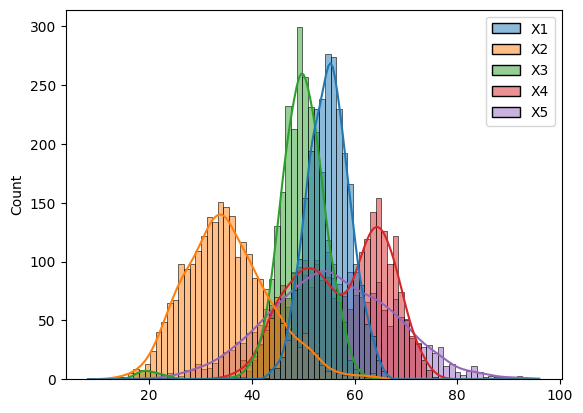

In [17]:
sns.histplot(data=df, kde=True)

(0.0, 100.0)

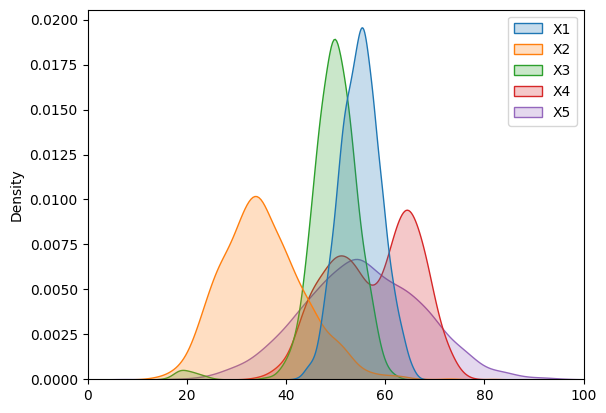

In [20]:
sns.kdeplot(data=df, multiple = 'layer', fill = True)
plt.xlim(0,100)

<Axes: >

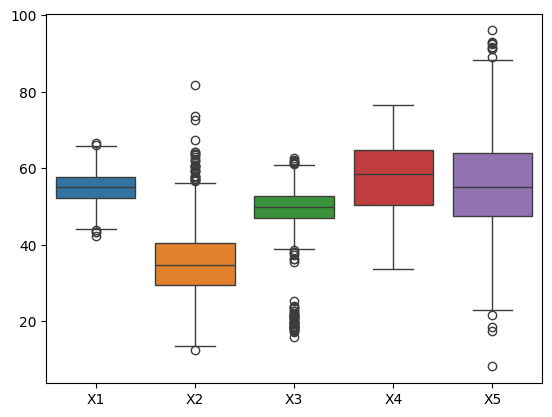

In [10]:
sns.boxplot(data=df)

2. En función a la respuesta al ítem anterior, ¿qué medidas de posición y dispersión le parecen más adecuadas para describir a cada uno de estos conjuntos de datos?

3. Realice el escalado de este grupo de variables a través de cada una de las técnicas presentadas en clases (**Z-Score, escalado min-max, escalado máximo absoluto y escalado robusto**). En cada caso, represente gráficamente las variables transformadas y comente brevemente lo observado.

<Axes: >

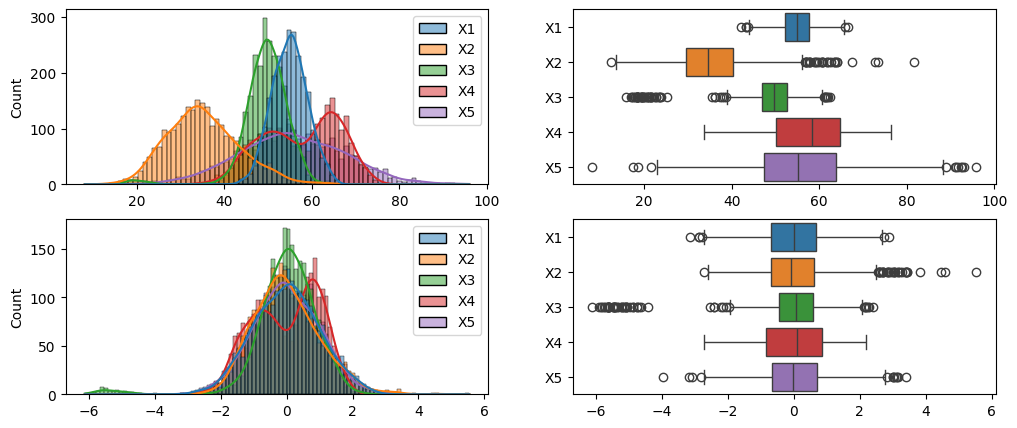

In [11]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)

fig, axes = plt.subplots(2,2,figsize=(12,5))
sns.histplot(df,kde=True, ax=axes[0,0])
sns.histplot(df_std,kde=True, ax=axes[1,0])
sns.boxplot(df, ax=axes[0,1], orient='h')
sns.boxplot(df_std, ax=axes[1,1], orient='h')

<Axes: >

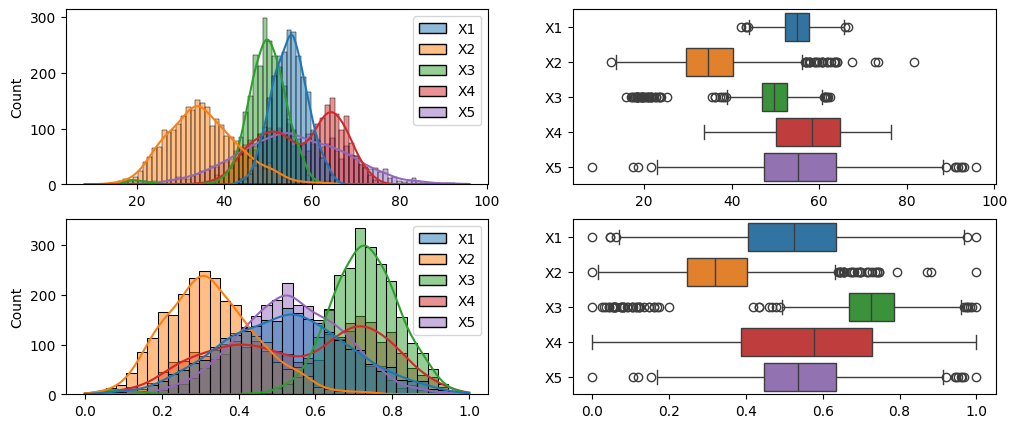

In [12]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)


fig, axes = plt.subplots(2,2,figsize=(12,5))

sns.histplot(df, kde=True, ax=axes[0,0])
sns.histplot(df_min_max, kde=True, ax=axes[1,0])
sns.boxplot(df, ax=axes[0,1], orient='h')
sns.boxplot(df_min_max, ax=axes[1,1], orient='h')

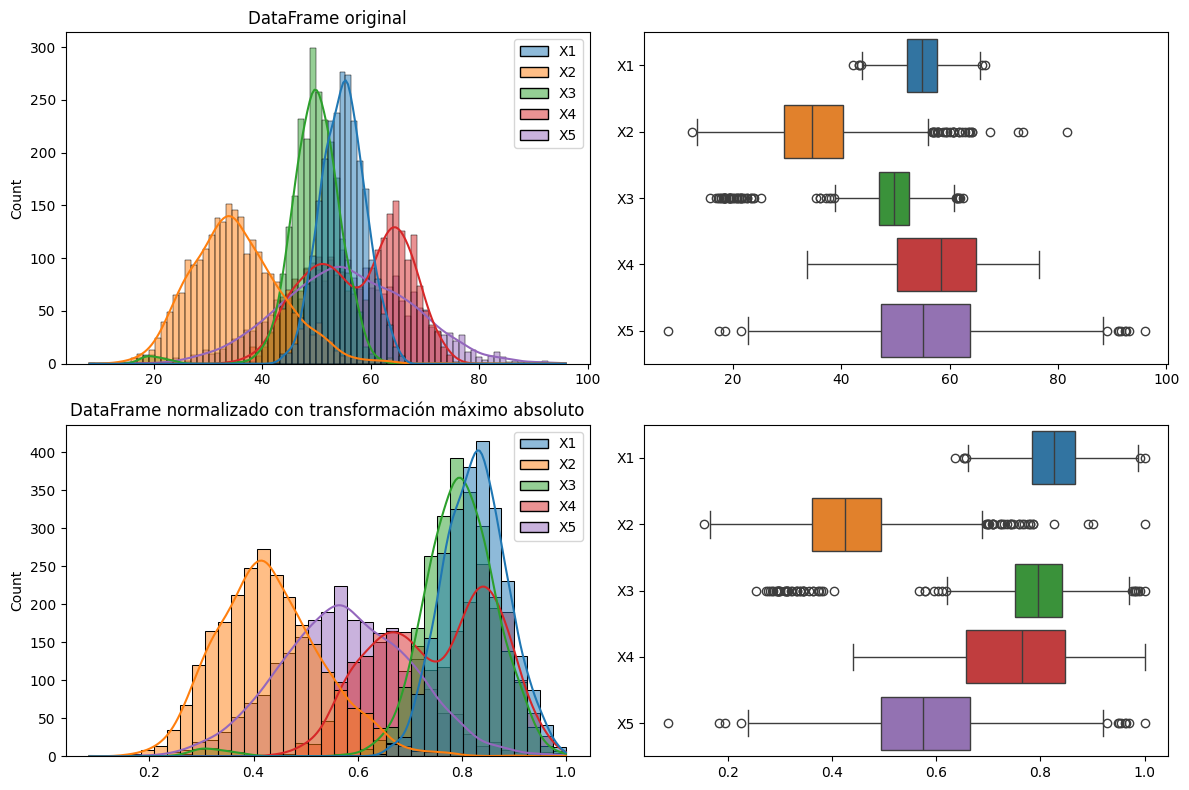

In [13]:
from sklearn.preprocessing import MaxAbsScaler

# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(df)

# the maximum absolute values calculated by the fit method
abs_scaler.max_abs_
# array([4.0e+05, 1.7e+01])

# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.transform(df)

# store the results in a data frame
df_max_abs = pd.DataFrame(scaled_data, columns=df.columns)

# visualize the data frame

fig, axes = plt.subplots(2,2,figsize=(12,8))

sns.histplot(data=df, kde=True, ax=axes[0,0])
axes[0,0].set_title("DataFrame original")
sns.histplot(data=df_max_abs, kde=True, ax=axes[1,0])
axes[1,0].set_title("DataFrame normalizado con transformación máximo absoluto")
sns.boxplot(data=df,ax=axes[0,1], orient='h')
sns.boxplot(data=df_max_abs,ax=axes[1,1], orient='h')
plt.tight_layout()
plt.show()

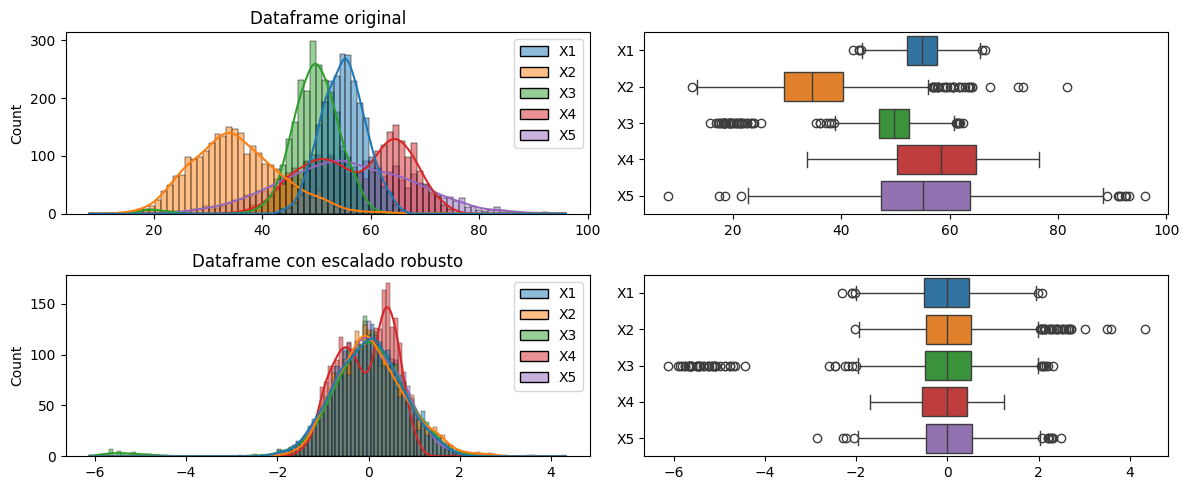

In [14]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
df_robusto = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)


fig, axes = plt.subplots(2,2,figsize=(12,5))
axes[0,0].set_title("Dataframe original")
sns.histplot(df, kde=True, ax=axes[0,0])
sns.histplot(df_robusto, kde=True, ax=axes[1,0])
axes[1,0].set_title("Dataframe con escalado robusto")
sns.boxplot(df, ax=axes[0,1], orient='h')
sns.boxplot(df_robusto, ax=axes[1,1], orient='h')
plt.tight_layout()
plt.show()